# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

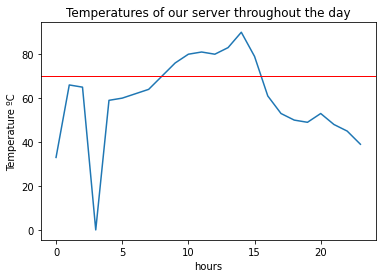

In [65]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [24]:
# assign a variable to the list of temperatures
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

# 1. Calculate the minimum of the list and print the value using print()
minimum = min(temperatures_C)
print("minimum = ",minimum)

minimum =  0


**Expected output**: 
```
minimum = 0
```

In [25]:
# 2. Calculate the maximum of the list and print the value using print()
maximum = max(temperatures_C)
print("maximum = ",maximum)

maximum =  90


**Expected output**: 
```
maximum = 90
```

In [26]:
# 3. Items in the list that are greater than 70ºC and print the result
higher_70=[]

for temp in temperatures_C:
    if(temp>= 70):
        higher_70.append(temp)
        
print("temperatures higher or equal than 70ºC ",higher_70)


temperatures higher or equal than 70ºC  [70, 76, 80, 81, 80, 83, 90, 79]


**Expected output**: 
```
temperatures higher or equal than 70ºC [70, 76, 80, 81, 80, 83, 90, 79]
```

In [27]:
# 4. Calculate the mean temperature throughout the day and print the result
mean = sum(temperatures_C)/len(temperatures_C)
print("mean = ",mean)

mean =  60.25


**Expected output**: 
```
mean = 60.25
```

In [28]:
# 5.1 Solve the fault in the sensor by estimating a value
#Average two closest values
mean3 = (temperatures_C[2]+temperatures_C[4])/2
print("Estimation of the temperature at 3:00 = ",mean3)


Estimation of the temperature at 3:00 =  62.0


**Expected output**: 
```
Estimation of the temperature at 3:00 = 62.0
```

In [29]:
# 5.2 Update of the estimated value at 03:00 on the list
fixed_temperatures = []

for i in range(len(temperatures_C)):
    if(temperatures_C[i] == 0):
        fixed_temperatures.append((temperatures_C[i-1]+temperatures_C[i+1])/2)
    else:
        fixed_temperatures.append(temperatures_C[i])
        
print("Corrected temperatures after estimation: ",fixed_temperatures)

Corrected temperatures after estimation:  [33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]


**Expected output**: 
```
Corrected temperatures after estimation:  [33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
```

In [30]:
# Bonus: convert the list of ºC to ºFarenheit
faren = []

for temp in fixed_temperatures:
    converted_temp = 1.8*temp + 32
    faren.append(converted_temp)
        
print("Temperatures in Fahrenheit Grades = ",faren)

Temperatures in Fahrenheit Grades =  [91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


**Expected output**: 
```
Temperatures in Fahrenheit Grades = [91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]
```

## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [48]:
# Print True or False depending on whether you would change the cooling system or not
counter=0
for temp in fixed_temperatures:
    if(temp >70):
        counter+=1

if ((counter>4) | (maximum>80) | (mean > 65)):
    Alarm = True
        
print(Alarm)


True


**Expected output**: 
```
True
```

## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [49]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
hours_70=[]

for i in range(len(temperatures_C)):
    if(temperatures_C[i]>= 70):
        hours_70.append(i)
        
print(hours_70)



[8, 9, 10, 11, 12, 13, 14, 15]


**Expected output**: 
```
[8, 9, 10, 11, 12, 13, 14, 15]```

In [50]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. 
#Is this condition met?
for i in range(len(temperatures_C)):
    if((temperatures_C[i-3]>70)&(temperatures_C[i-2]>70)&(temperatures_C[i-1]>70)&(temperatures_C[i]>70)):
        Alarm = True
print(Alarm)


True


**Expected output**: 
```
True
```

In [51]:
# 3. Average of each of the lists (ºC and ºF). How they relate?
mean_cel = sum(fixed_temperatures)/len(fixed_temperatures)
mean_faren = sum(faren)/len(faren)
conversion_celsius2faren = 1.8*mean_cel + 32

print("Mean in celcius = ",mean_cel)
print("Mean in Farenheit = ",mean_faren)
print("Mean conversion from Cº to Fº  = ",conversion_celsius2faren, ".The mean is the same obv")

Mean in celcius =  62.833333333333336
Mean in Farenheit =  145.1
Mean conversion from Cº to Fº  =  145.10000000000002 .The mean is the same obv


**Expected output**: 
```
62.833333333333336
145.1
145.1 145.10000000000002
```

In [58]:
# 4. Standard deviation of each of the lists. How they relate?
import statistics
dev_cel = statistics.stdev(fixed_temperatures)
dev_faren = statistics.stdev(faren)
dev_conversion_celsius2faren = 1.8*dev_cel

print("Standard deviation in celcius = ",dev_cel)
print("Standard deviation in Farenheit = ",dev_faren)
print("Standard deviation conversion from Cº to Fº  = ",dev_conversion_celsius2faren)


Standard deviation in celcius =  14.94821980579356
Standard deviation in Farenheit =  26.906795650428407
Standard deviation conversion from Cº to Fº  =  26.906795650428407


**Expected output**: 
```
14.633485192833897
26.34027334710101
26.34027334710101 26.340273347101014
```

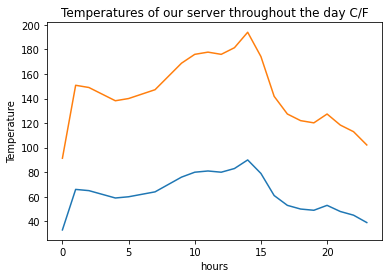

In [70]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
x = list(range(len(faren)))

# plot 
plt.plot(x, fixed_temperatures)
plt.xlabel('hours')
plt.ylabel('Temperature')
plt.title('Temperatures of our server throughout the day C/F')
plt.plot(x, faren)